# Bayesian optimization example

### Bayesian optimization은 Bayes inference를 기반으로 Model의 parameter를 tuning하는 방법입니다.
### 본 example에서는 SVM model에서 $\lambda$와 $\gamma$

In [16]:
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np

data, target = make_classification(n_samples=2500,
                                   n_features=45,
                                   n_informative=15,
                                   n_redundant=5)

In [9]:
pd.DataFrame(target)

,0
0,1
1,0
2,1
3,1
4,0
...,...
2495,0
2496,0
2497,0
2498,0


In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

def sample_loss(params):
  C = params[0]
  gamma = params[1]

  # Sample C and gamma on the log-uniform scale
  model = SVC(C=10 ** C, gamma=10 ** gamma, random_state=12345)

  # Sample parameters on a log scale
  return cross_val_score(SVC(C=10 ** params[0], gamma=10 ** params[1], random_state=12345),
                          X=data, y=target, scoring='roc_auc', cv=3).mean()

In [22]:
lambdas = np.linspace(1, -4, 25)
gammas = np.linspace(1, -4, 20)

# We need the cartesian combination of these two vectors
param_grid = np.array([[C, gamma] for gamma in gammas for C in lambdas])

In [23]:
real_loss = [sample_loss(params) for params in param_grid]

In [24]:
real_loss

[0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.50079840433873,
 0.50079840433873,
 0.50079840433873,
 0.50079840433873,
 0.50079840433873,
 0.50079840433873,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.7437539378271185,
 0.7437539378271185,
 0.7437539378271185,
 0.7437539378271185,
 0.7437539378271185,
 0.6670534243880355,
 0.6378377108333687,
 0.6120331007644008,
 0.6

In [25]:
# The maximum is at:
param_grid[np.array(real_loss).argmax(), :]

array([ 1.        , -2.68421053])

In [ ]:
bounds = np.array([[-4, 1], [-4, 1]])

xp, yp = bayesian_optimisation(n_iters=30, 
                               sample_loss=sample_loss, 
                               bounds=bounds,
                               n_pre_samples=3,
                               random_search=100000)

NameError: name 'file_path' is not defined

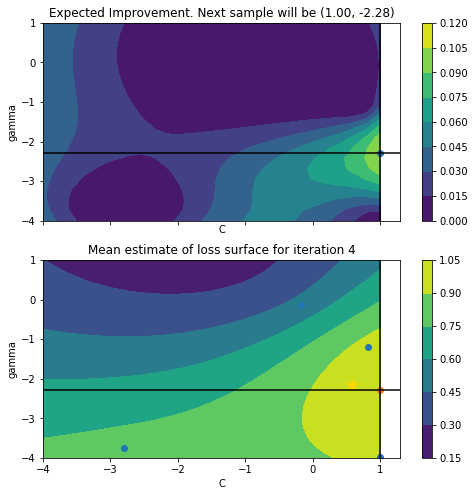

In [39]:
rc('text', usetex=False)
plot_iteration(lambdas, xp, yp, first_iter=3, second_param_grid=gammas, optimum=[0.58333333, -2.15789474])